In [8]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

#한글출력을 위한코드
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

#LogisticRegression, Linear SVC사용하려면 import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
###################Gradiant boosting#############

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [ ]:
#과적합(-) -> max_depth 낮추기(해결책)

In [11]:
gbrt = GradientBoostingClassifier(random_state=0,max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [12]:
#학습률을 낮춘경우

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


In [14]:
#그래피찍기 위한 함수
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

In [ ]:
#GradientBoosting vs Random Forest 비교

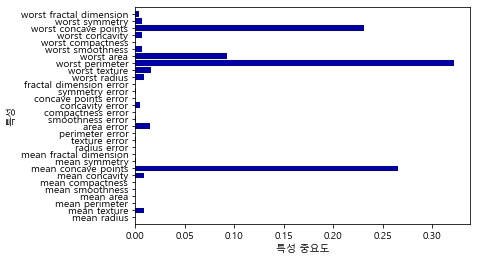

In [15]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

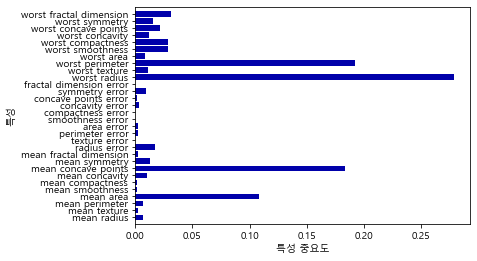

In [20]:
plot_feature_importances_cancer(forest)

In [ ]:
#Gradient Boosting은 계속수정을 해가면서(하므로) 일부 특성을 무시한다

In [ ]:
#장점 : 랜덤포레스트보다 성능좋음, 연속적 특성에도 사용가능
#단점 : 훈련시간up, 텍스트에 잘 작동x

In [ ]:
 ##############################앙상블 메소드#################

In [ ]:
#보팅분류기 : 분류기여러개가 투표 => 분류결정

In [26]:
#데이터 준비

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# 보팅클래스 : 랜덤포레스트, 로지스틱회귀, 결정트리 
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=42) 
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

In [27]:
from sklearn.metrics import accuracy_score 

for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [ ]:
#보팅분류기를 이용하면 성능이 향상 될 수 있다

In [ ]:
#OOB : 훈련때 선택되지않은 data -> 테스트데이터로 이용

In [31]:
from sklearn.ensemble import BaggingClassifier 
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)

#obb-score 출력
print("oob_score:",bag_clf.oob_score_)

#decisiontree bagging
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)


oob_score: 0.8986666666666666


0.912

In [ ]:
#단, 완전히 test 데이터와 같은것은 아니다.

In [ ]:
#추가적모델 : 
#Gradient Boosting 최적화 => XGBoost
#장점 : 속도up,확장성,이식성

In [35]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=3,
    random_state=42,
    eval_metric='logloss')

xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print("make-moon데이터 분류 결과:",accuracy_score(y_test, y_pred))


make-moon데이터 분류 결과: 0.872


In [ ]:
############SVM########################

In [37]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


In [ ]:
#SVM은 성능을 위해 전처리가 필요하다

In [40]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n", X_train_scaled.min(axis=0))
print("특성별 최댓값\n", X_train_scaled.max(axis=0))

X_test_scaled = (X_test - min_on_training) / range_on_training

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [41]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [ ]:
#전처리 -> 성능향상!

In [42]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [ ]:
#C가 클수록 제약이 완화된다.

In [ ]:
#SVC 장점 : 특성이적을때도 좋음, 성능좋음
#단점:전처리에 영향받음, 분석하기 어려움

In [ ]:
#SVM : 마진을 크게 => 경계를 확실하게 만들기

In [ ]:
######################신경망#############################

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [ ]:
#MLP도 성능향상을 위해 전처리가 필요하다! (like SVM)

In [46]:
#전처리
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\Bisu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#전처리후 성능향상됨!

In [48]:
#반복횟수를 1000으로 늘린경우 ->성능up
#단, 과적합위험할 수 있음

mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [ ]:
#신경망 장점 : 성능up
#단점: 전처리에 영향받음, 튜닝어렵

In [ ]:
#2장:지도학습
#종류 : 최근접이웃, 선형모델, 나이브베이즈,결정트리,랜덤로페스트,그래디언트부스팅,
#서포트벡터머신, 신경망